# Latent Semantic Analysis (35 Points) 


 - A. Singular Value Decomposition (SVD) based distributed representation of text and documents. You can use python libraries for matrix decomposition (scipy). To demonstrate your work, use the example dataset (Table 2) of "R. A. Harshman (1990). Indexing by latent semantic analysis. Journal of the American society for information science". (10 Points)

 - B. Visualize (2-D) the documents and terms using library of your choice. (10 Points)

 - C. Implement a function that converts a query string to distributed representation and retrieves relevent documents. Visualize the the results as shown in Fig 1 of the paper. (10 Points)

In [ ]:
import numpy as np
import math
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords, wordnet, words
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import warnings
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


## <CENTER>Task-1 (10 Points)

### Input data

In [ ]:
#Dataset
c1 = 'Human machine interface for Lab ABC computer applications'
c2 = 'A survey of user opinion of computer system response time'
c3 = 'The EPS user interface management system'
c4 = 'System and human system engineering testing of EPS'
c5 = 'Relation of user-perceived response time to error measurement'
m1 = 'The generation of random, binary, unordered trees'
m2 = 'The intersection graph of paths in trees'
m3 = 'Graph minors IV: Widths of trees and well-quasi-ordering'
m4 = 'Graph minors: A survey'
documents = [c1, c2, c3, c4, c5, m1, m2, m3, m4]

### Perform preprocessing of documents

In the below cell remove punctuations and keep only words which belong to nltk corpus

In [ ]:
# TASK CELL
def preprocess(message):
    '''
    Input:
        message: a string containing a message.
    Output:
        preprocessed_message_list: a list of words containing the processed message. 

    '''
    tokenizer = RegexpTokenizer(r'\w+')
    preprocessed_message_list = []
    for token in tokenizer.tokenize(message):
      tokens = token.lower()
      if tokens in words.words():
        token = token.lower()
        preprocessed_message_list.append(token)
      else: 
        preprocessed_message_list.append(token)      
   

    return preprocessed_message_list

### Verify preprocessed data

In [ ]:
for sent in documents:
    print(preprocess(sent))

['human', 'machine', 'interface', 'for', 'lab', 'ABC', 'computer', 'applications']
['a', 'survey', 'of', 'user', 'opinion', 'of', 'computer', 'system', 'response', 'time']
['the', 'EPS', 'user', 'interface', 'management', 'system']
['system', 'and', 'human', 'system', 'engineering', 'testing', 'of', 'EPS']
['relation', 'of', 'user', 'perceived', 'response', 'time', 'to', 'error', 'measurement']
['the', 'generation', 'of', 'random', 'binary', 'unordered', 'trees']
['the', 'intersection', 'graph', 'of', 'paths', 'in', 'trees']
['graph', 'minors', 'IV', 'Widths', 'of', 'trees', 'and', 'well', 'quasi', 'ordering']
['graph', 'minors', 'a', 'survey']


##### Expected Output
```CPP
['human', 'machine', 'interface', 'for', 'lab', 'ABC', 'computer', 'applications']
['a', 'survey', 'of', 'user', 'opinion', 'of', 'computer', 'system', 'response', 'time']
['the', 'EPS', 'user', 'interface', 'management', 'system']
['system', 'and', 'human', 'system', 'engineering', 'testing', 'of', 'EPS']
['relation', 'of', 'user', 'perceived', 'response', 'time', 'to', 'error', 'measurement']
['the', 'generation', 'of', 'random', 'binary', 'unordered', 'trees']
['the', 'intersection', 'graph', 'of', 'paths', 'in', 'trees']
['graph', 'minors', 'IV', 'Widths', 'of', 'trees', 'and', 'well', 'quasi', 'ordering']
['graph', 'minors', 'a', 'survey']
```

### Assign names to document names
In the below cell create a list of document names. It will be later used to visualize documents

In [ ]:
def createDocName(documents):
  '''
    Input:
        documents: list of documents.
    Output:
        doc_names: a list of document names. 

    '''
  docName = []
  for i in range(len(documents)):
    if i <5:
      name = 'c'+str(i+1)
      docName.append(name)
    else:
      name = 'm'+str(i-4)
      docName.append(name)
  
  return docName

In [ ]:
docName = createDocName(documents)
print(docName)

['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']


##### Expected Output
``` CPP
['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']
```

### Words to Index mapping
Retrieve words from documents and create map of word and associate index to it

In [ ]:
def build_word_to_ix(documents, stop_words):
  '''
    Input:
        documents: list of documents
        stopwords: list of stopwords
    Output:
        doc_names: map of words and assoicated index. 

    '''
  freq = {}
  for sent in documents:
    words = preprocess(sent)
    for word in words:
      if word not in stop_words:
        if word in freq:
          freq[word] += 1
        else:
          freq[word] = 1
  index = 0
  word_to_ix = {}
  for key, value in freq.items():
    if value > 1:
      word_to_ix[key] = index
      index += 1

  return word_to_ix

In [ ]:
stop_words = set(stopwords.words('english')) 
word_to_ix = build_word_to_ix(documents, stop_words)
print(word_to_ix)

{'human': 0, 'interface': 1, 'computer': 2, 'survey': 3, 'user': 4, 'system': 5, 'response': 6, 'time': 7, 'EPS': 8, 'trees': 9, 'graph': 10, 'minors': 11}


##### Expected Output
```CPP
{'human': 0, 'interface': 1, 'computer': 2, 'user': 3, 'survey': 4, 'system': 5, 'time': 6, 'response': 7, 'EPS': 8, 'trees': 9, 'graph': 10, 'minors': 11}
```

### Document-Terms count matrix

In [ ]:
def build_td_matrix(documents, word_to_ix):
  '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
    Output:
        td_matrix: matrix of count of words in documents, each row 
            represent a word and each column represent a document

    '''
  td_matrix = [[0] * len(documents)] * len(word_to_ix)
  td_matrix = np.array(td_matrix, dtype = 'f')

  for i in range(len(documents)):
    words = preprocess(documents[i])
    for word in words:
      if word in word_to_ix:
        td_matrix[word_to_ix[word]][i] += 1


  return td_matrix

In [ ]:
X = build_td_matrix(documents, word_to_ix)
print(X)

[[1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 2. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]]


##### Expected Output
```CPP
[[1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 2. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]]
 ```

### Singular Value Decomposition
Perform singular value decomposition of count matrix into term singular vector matrix, singular value matrix and document singular vector matrix
- To perform the singular value decompostion please check tutorial:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [ ]:
def svd(documents, word_to_ix, rank):
  '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
        rank: number of colums/rows to retain in decomposed matrix
    Output:
        Uk: term singular vector matrix
        Sk: singular value matrix
        Vk_t: transpose of document singular vector matrix
    '''
  X = build_td_matrix(documents, word_to_ix)
  U, S, V = np.linalg.svd(X)

  Uk = U[:, 0:rank]
  S = np.diag(S)
  Sk = S[0:rank, 0:rank]
  V_t = np.transpose(V)
  Vk_t = V_t[:,0:rank]

  return Uk, Sk, Vk_t

In [ ]:
Uk, Sk, Vk_t = svd(documents, word_to_ix, 2)
print(Uk)
print(Sk)
print(Vk_t)

[[-0.22135077 -0.11317962]
 [-0.1976454  -0.07208778]
 [-0.24047023  0.04315195]
 [-0.20591787  0.27364743]
 [-0.40359887  0.05707026]
 [-0.6444812  -0.16730121]
 [-0.26503748  0.10715957]
 [-0.26503748  0.10715957]
 [-0.30082816 -0.14127047]
 [-0.01274618  0.4901618 ]
 [-0.03613585  0.6227852 ]
 [-0.03175633  0.45050892]]
[[3.3408837 0.       ]
 [0.        2.541701 ]]
[[-0.1973928  -0.05591352]
 [-0.6059903   0.16559288]
 [-0.4629175  -0.12731206]
 [-0.54211444 -0.23175523]
 [-0.2794691   0.10677472]
 [-0.00381521  0.19284794]
 [-0.01463147  0.43787488]
 [-0.02413684  0.6151219 ]
 [-0.08195737  0.5299371 ]]


##### Expected Output
```CPP 
[[-0.22135078 -0.11317962]
 [-0.1976454  -0.07208778]
 [-0.24047023  0.04315195]
 [-0.40359886  0.05707026]
 [-0.20591786  0.27364743]
 [-0.64448115 -0.16730121]
 [-0.26503747  0.10715957]
 [-0.26503747  0.10715957]
 [-0.30082816 -0.14127047]
 [-0.01274618  0.49016179]
 [-0.03613585  0.62278523]
 [-0.03175633  0.45050892]]
[[3.34088375 0.        ]
 [0.         2.541701  ]]
[[-0.1973928  -0.05591352]
 [-0.60599027  0.16559288]
 [-0.46291751 -0.12731206]
 [-0.54211442 -0.23175523]
 [-0.27946911  0.10677472]
 [-0.00381521  0.19284794]
 [-0.01463147  0.43787488]
 [-0.02413684  0.6151219 ]
 [-0.08195737  0.52993707]]
 ```

## <CENTER>Task-2 (10 Points)

### Visualize documents in 2D space

In [ ]:
#Visualize documents and print coordinates
docs_vis = np.dot(Vk_t, Sk)
x = []
y = []
for value in docs_vis:
  x.append(value[0])
  y.append(value[1])
docs_vis

array([[-0.65946645, -0.14211546],
       [-2.024543  ,  0.4208876 ],
       [-1.5465536 , -0.3235892 ],
       [-1.8111413 , -0.5890525 ],
       [-0.9336738 ,  0.27138942],
       [-0.01274618,  0.4901618 ],
       [-0.04888203,  1.1129471 ],
       [-0.08063836,  1.563456  ],
       [-0.27381006,  1.3469417 ]], dtype=float32)

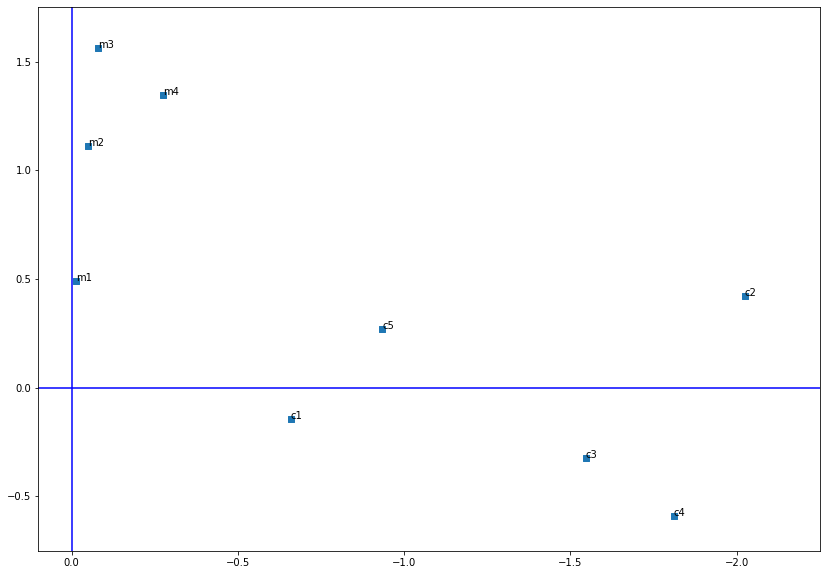

In [ ]:
plt.figure(figsize=(14, 10))
# plotting scatter plot
plt.scatter(x, y, marker = 's')
  
# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(docName[i], (x[i], y[i]))
  
# adjusting the scale of the axes
plt.axhline(y=0, color='b')
plt.axvline(x=0, color='b')
plt.ylim((-0.75, 1.75))
plt.xlim((0.10, -2.25))
plt.show()

##### Expected
```CPP
[[-0.65946641 -0.14211544]
 [-2.02454304  0.42088758]
 [-1.54655358 -0.32358919]
 [-1.81114125 -0.5890525 ]
 [-0.9336738   0.2713894 ]
 [-0.01274618  0.49016179]
 [-0.04888203  1.11294703]
 [-0.08063836  1.56345595]
 [-0.27381004  1.34694158]]
```
terms.png

### Visualize terms in 2D space

In [ ]:
#Visualize terms and print coordinates
term_vis = np.dot(Uk, Sk)
x1 = []
y1 = []
for value in term_vis:
  x1.append(value[0])
  y1.append(value[1])
term_vis

array([[-0.7395072 , -0.28766876],
       [-0.66031027, -0.18322559],
       [-0.80338305,  0.10967936],
       [-0.68794763,  0.69552994],
       [-1.3483769 ,  0.14505553],
       [-2.1531367 , -0.42522967],
       [-0.8854594 ,  0.2723676 ],
       [-0.8854594 ,  0.2723676 ],
       [-1.005032  , -0.35906732],
       [-0.04258352,  1.2458448 ],
       [-0.12072567,  1.5829338 ],
       [-0.1060942 ,  1.145059  ]], dtype=float32)

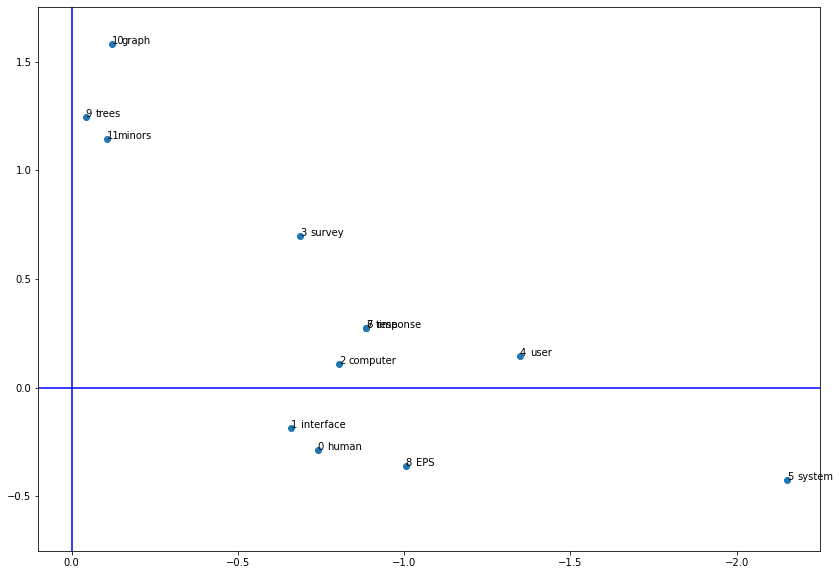

In [ ]:
terms = []
index = []
for key, value in word_to_ix.items():
    terms.append(key)
    index.append(value)

plt.figure(figsize=(14, 10))
# plotting scatter plot
plt.scatter(x1, y1)
  
# Loop for annotation of all points
for i in range(len(x1)):
    plt.annotate(terms[i], (x1[i] - 0.03, y1[i]))
    plt.annotate(index[i], (x1[i], y1[i]))
  
# adjusting the scale of the axes
plt.axhline(y=0, color='b')
plt.axvline(x=0, color='b')
plt.ylim((-0.75, 1.75))
plt.xlim((0.10, -2.25))
plt.show()

##### Expected
```CPP
[[-0.73950722 -0.28766875]
 [-0.66031031 -0.18322558]
 [-0.80338307  0.10967936]
 [-1.34837689  0.14505553]
 [-0.68794764  0.69552995]
 [-2.15313661 -0.42522964]
 [-0.88545938  0.27236759]
 [-0.88545938  0.27236759]
 [-1.00503193 -0.35906729]
 [-0.04258352  1.24584472]
 [-0.12072567  1.58293385]
 [-0.1060942   1.14505897]]
```
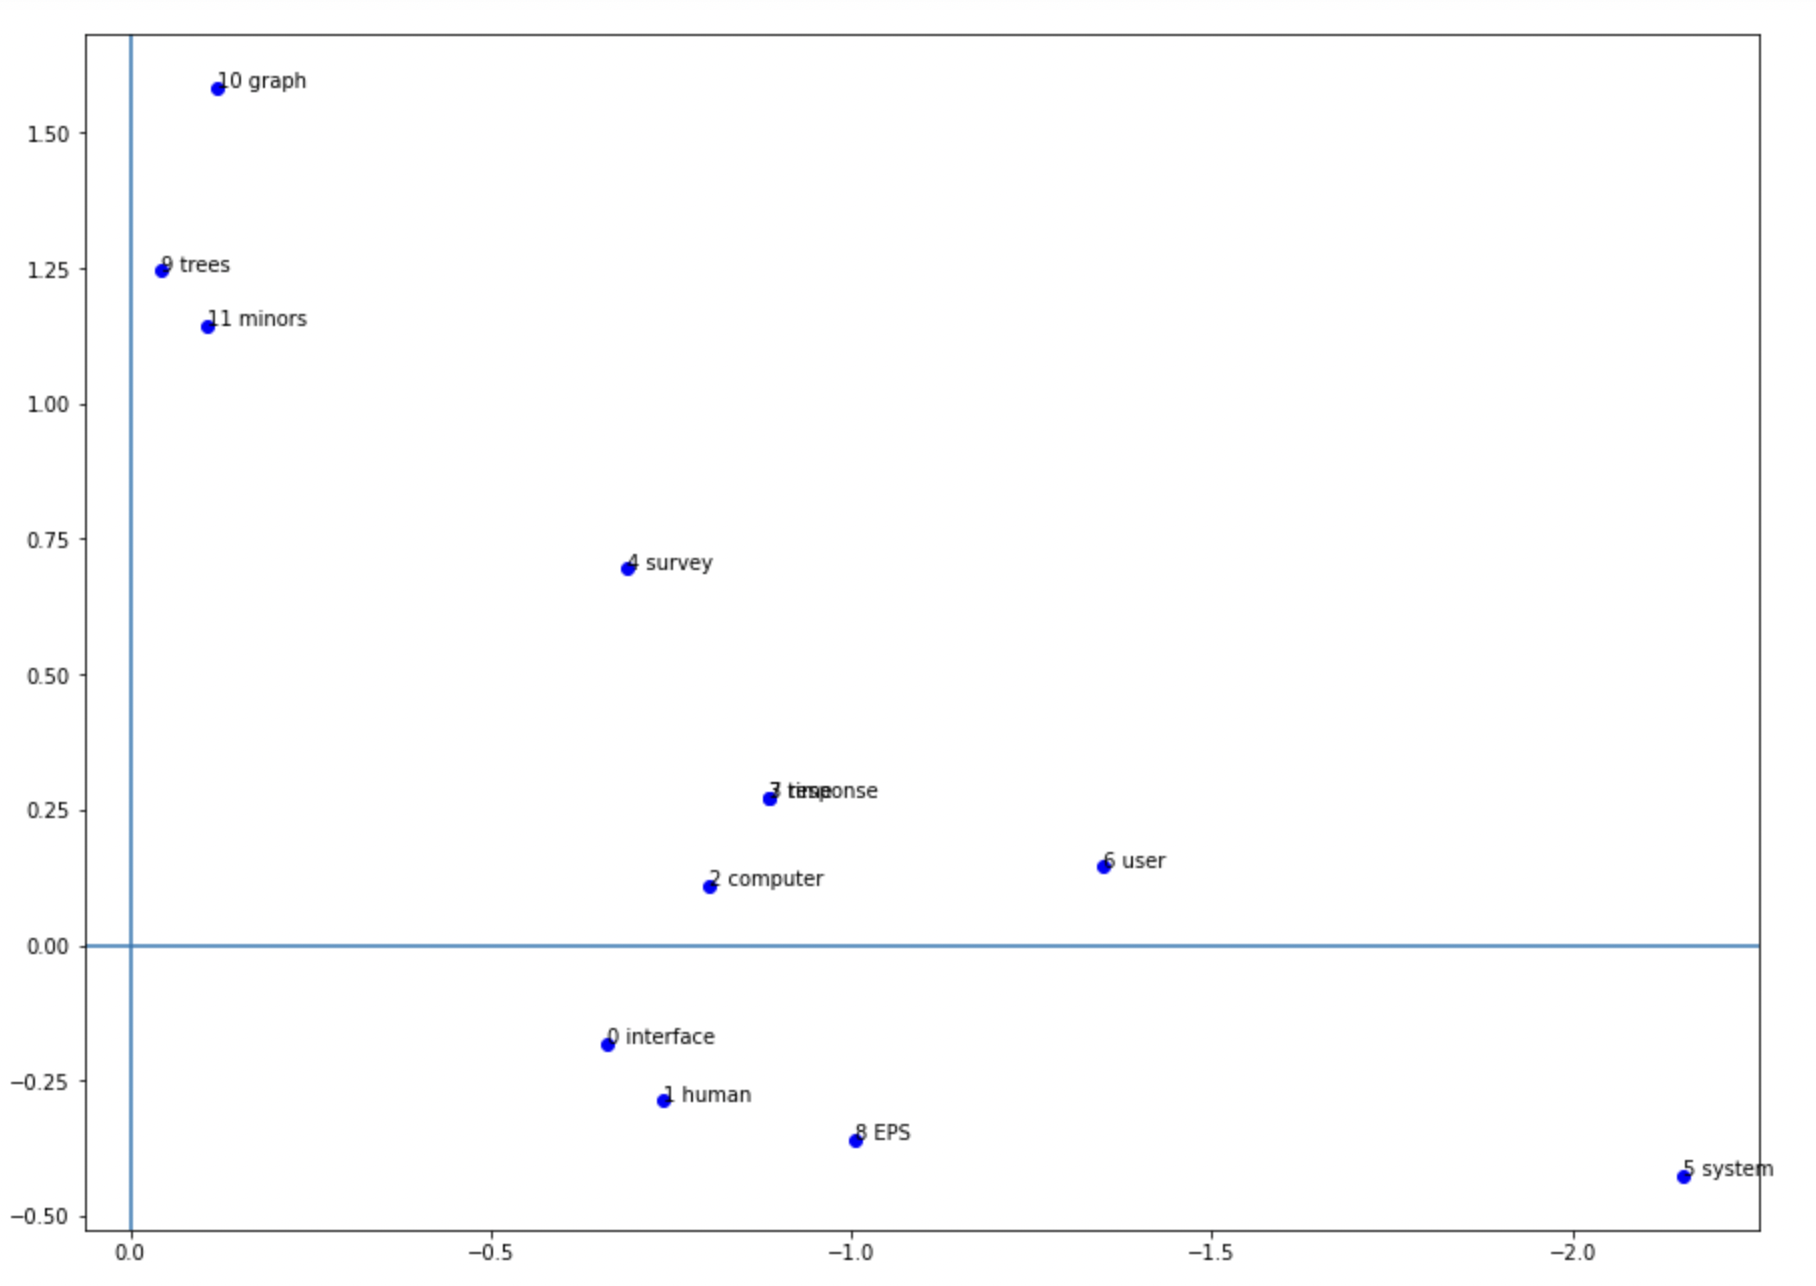

## <CENTER>Task-3 (10 Points)

### Find matching documents for given document

In [ ]:
# Hint create query vector for input document. Calculate its cosine distance from other documents

def query(s, Uk, Sk, Vk_t, word_to_ix, documents, min_score=0.9):
    '''
    Input
        s:query document.
        Uk:Term matrix
        Sk:singular value matrix
        Vk_t:Document matrix
        word_to_ix: {word, index} map
        documents:list of document
        min_score:min score beyond which documents are considerd matching
    Output:
        q_hat: coordinates of query vector
        matches: list of tuples containing matching document and its score
    '''
    vector = build_td_matrix([s], word_to_ix)
    
    v = np.transpose(Vk_t)

    qt = np.transpose(vector)
    q_hat = np.dot(qt, Uk)
    
    matches = []
    for i in range(len(documents)):
      score = (np.matmul(np.matmul(Sk,v[:,i]),np.transpose(q_hat))/(np.linalg.norm(np.matmul(Sk,v[:,i]))*np.linalg.norm(q_hat)))
      if score >= min_score:
        matches.append((documents[i], score[0]))

    return q_hat, matches

In [ ]:
q_hat, matches = query('human computer interaction', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)
print(q_hat)
if matches is not None:
    print(matches)
else:
    print("No matches found")

[[-0.46182102 -0.07002766]]
[('Human machine interface for Lab ABC computer applications', 0.998093), ('A survey of user opinion of computer system response time', 0.93748635), ('The EPS user interface management system', 0.9984453), ('System and human system engineering testing of EPS', 0.9865887), ('Relation of user-perceived response time to error measurement', 0.90755945)]


##### Expected
```CPP
[-0.461821   -0.07002767]
[('The EPS user interface management system', 0.9984452813340272), ('Human machine interface for Lab ABC computer applications', 0.9980930095689974), ('System and human system engineering testing of EPS', 0.9865886405556598), ('A survey of user opinion of computer system response time', 0.9374863669686595), ('Relation of user-perceived response time to error measurement', 0.9075594362644345)]
```

### Visual representation of query/document

In [ ]:
# Plot terms, documents and query documents along with lines representing its cosine angle 
point1 = [0, 0]
point2 = [-1 + q_hat[0][0], -1 * math.cos(.9) + q_hat[0][1] ]
point3 = [-1 + q_hat[0][0], 1 * math.cos(.9) + q_hat[0][1]]

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=50, c='b', marker="s")
ax1.scatter(x1,y1, s=50, c='y', marker="o")
ax1.scatter(q_hat[0][0],q_hat[0][1], s=50, c='r', marker="o")
ax1.plot([point1[0], point2[0]], [point1[1], point2[1]], color = 'orange')
ax1.plot([point1[0], point3[0]], [point1[1], point3[1]], color = 'green')

for i in range(len(x1)):
    plt.annotate(terms[i], (x1[i] - 0.03, y1[i]))
    plt.annotate(index[i], (x1[i], y1[i]))

# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(docName[i], (x[i], y[i]))

plt.annotate('q', (q_hat[0][0],q_hat[0][1]))

# adjusting the scale of the axes
plt.axhline(y=0, color='b')
plt.axvline(x=0, color='b')
plt.ylim((-0.75, 1.75))
plt.xlim((0.10, -2.25))
plt.show()

##### Expected

final.png


## **Theory questions: (5 points)**
- A) Give short description of Left-eigen vectors, right-eigen vectors and eigen-values matrix retured by Singular Value Decompostion of document-terms count matrix.
- B) Visually represent the document "Graph and tree generation" in 2D space along with words and documents as given in previous question.

**A)** \

Any rectanglar matrix of terms and documents (t x d) can be decomposed into product of 3 matrices, this is called SVD. \
$$ X = T_0S_0D_0$$
$T_0$ and $D_0$ are orthogonal and $S_0$ is diagonal. \
$T_0$ is the left eigen vector matrix and vector extracts the document to document similarity \
$D_0$ is the right eigen vector matrix and vector extracts the strength of two different words \
$S_0$ is the eigen values matrix which explains the variance ratio \
These matrices can be used to decompose any matrix. In general, $X = T_0S_0D'$ are full rank. SVD allows a simple strategy where in singular values in $S_0$ are ordered by size and first $k$ largest may be kept and others are set to $0$, then by multiplying this we get $\hat{X}$ which is approximately equal to $X$ and has rank $k$. Thus the results in a reduced model $X â‰ˆ \hat{X} = TSD'$. This is the rank $k$ model with best possible least squares fit. \

Using these matrices above we can extract the following: \
* Comparing two terms - Dot product of two row vectors of $\hat{X}$ $$\hat{X}\hat{X'} = TS^2T'$$
This proves that product of $\hat{X}\hat{X'}$ has the term-to-term dot products
* Comparing two documents - Dot product of two document vectors of $\hat{X}$ $$\hat{X'}\hat{X} = DS^2D'$$
This proves that product of $\hat{X'}\hat{X}$ has the document-to-document dot products
* Comparing a term and document - Represented by each cell of $\hat{X}$


In [ ]:
q_hat, matches = query('Graph and tree generation', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)
print(q_hat)
if matches is not None:
    print(matches)
else:
    print("No matches found")

[[-0.03613585  0.6227852 ]]
[('The generation of random, binary, unordered trees', 0.99948925), ('The intersection graph of paths in trees', 0.99990094), ('Graph minors IV: Widths of trees and well-quasi-ordering', 0.9999793), ('Graph minors: A survey', 0.989851)]


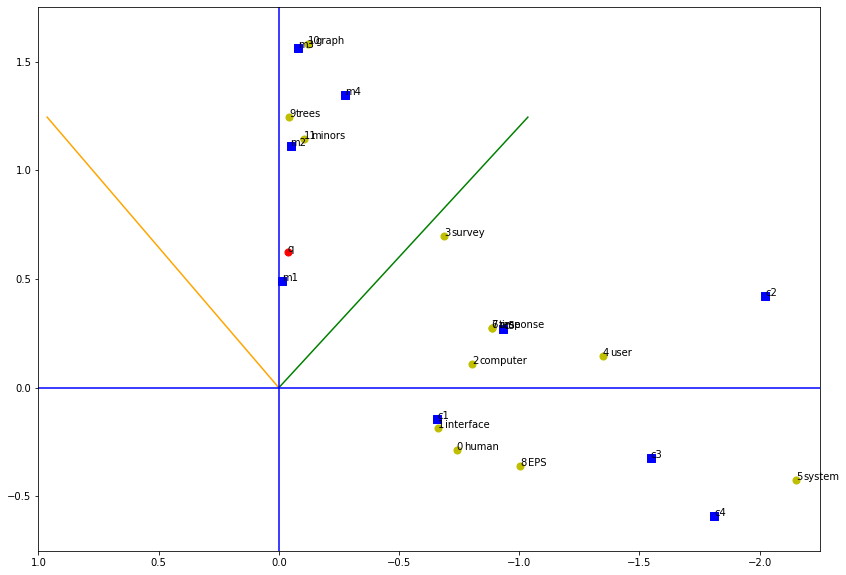

In [ ]:
# Plot terms, documents and query documents along with lines representing its cosine angle 

point1 = [0, 0]
point2 = [1 + q_hat[0][0], 1 * math.cos(.9) + q_hat[0][1] ]
point3 = [-1 + q_hat[0][0], 1 * math.cos(.9) + q_hat[0][1]]

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=50, c='b', marker="s")
ax1.scatter(x1,y1, s=50, c='y', marker="o")
ax1.scatter(q_hat[0][0],q_hat[0][1], s=50, c='r', marker="o")
ax1.plot([point1[0], point2[0]], [point1[1], point2[1]], color = 'orange')
ax1.plot([point1[0], point3[0]], [point1[1], point3[1]], color = 'green')

for i in range(len(x1)):
    plt.annotate(terms[i], (x1[i] - 0.03, y1[i]))
    plt.annotate(index[i], (x1[i], y1[i]))

# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(docName[i], (x[i], y[i]))

plt.annotate('q', (q_hat[0][0],q_hat[0][1]))

# adjusting the scale of the axes
plt.axhline(y=0, color='b')
plt.axvline(x=0, color='b')
plt.ylim((-0.75, 1.75))
plt.xlim((1, -2.25))
plt.show()